In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

In [90]:
data=pd.read_csv("Data.csv")

In [91]:
data.head(5)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [92]:
print(data.shape)

(48842, 15)


In [93]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [94]:
data["workclass"].replace({"?":"other"},inplace=True)
data["occupation"].replace({"?":"other"},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_24648\284776254.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["workclass"].replace({"?":"other"},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_24648\284776254.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [95]:
data.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [96]:
print(data["workclass"].unique())

['Private' 'Local-gov' 'other' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [108]:
import pandas as pd

data = pd.read_csv("Data.csv")

print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [97]:
data=[~data["workclass"].isin(["Without-pay","Never-worked"])]

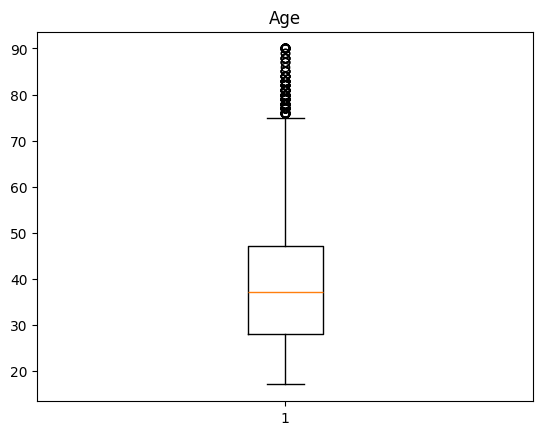

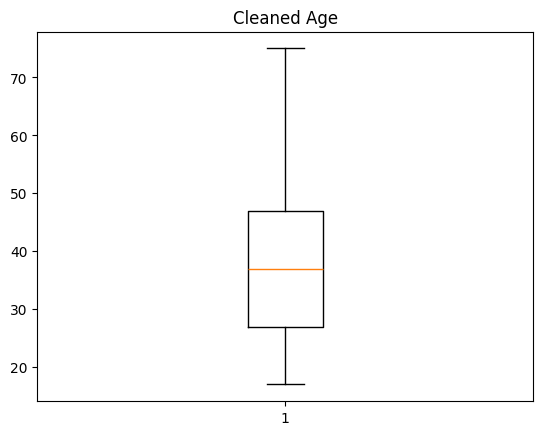

In [107]:
# Age
plt.boxplot(data['age']); plt.title("Age"); plt.show()
data = data[(data['age'] >= 17) & (data['age'] <= 75)]
plt.boxplot(data['age']); plt.title("Cleaned Age"); plt.show()

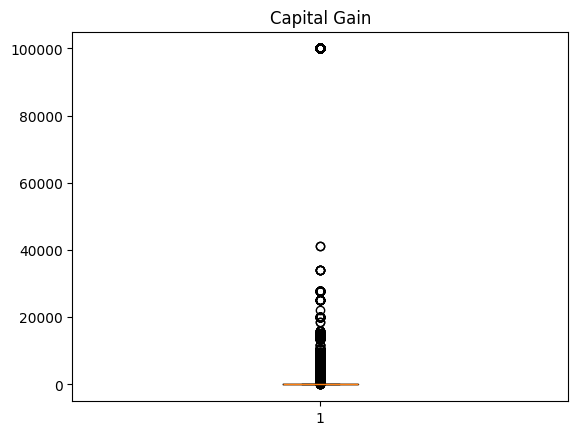

In [106]:
#Capital Gain
plt.boxplot(data['capital-gain']); plt.title("Capital Gain"); plt.show()




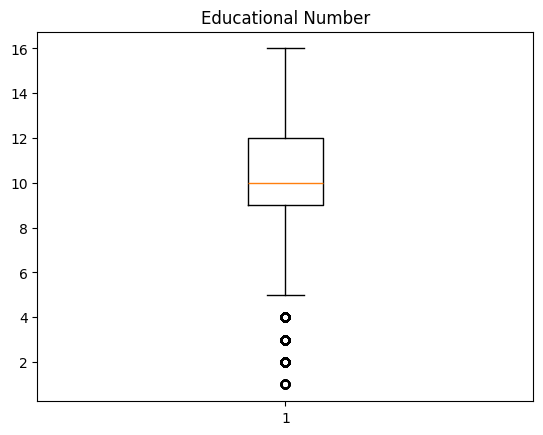

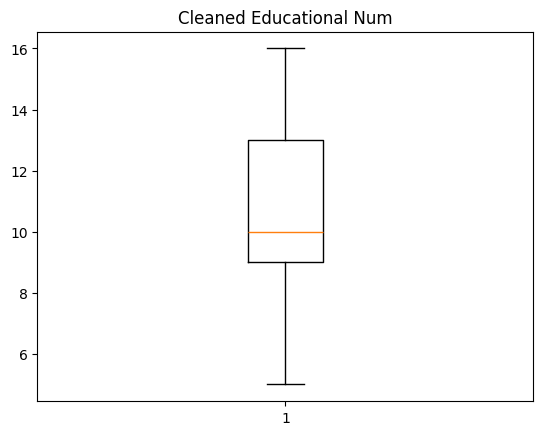

In [105]:
# Educational Num
plt.boxplot(data['educational-num']); plt.title("Educational Number"); plt.show()
data = data[(data['educational-num'] >= 5) & (data['educational-num'] <= 16)]
plt.boxplot(data['educational-num']); plt.title("Cleaned Educational Num"); plt.show()


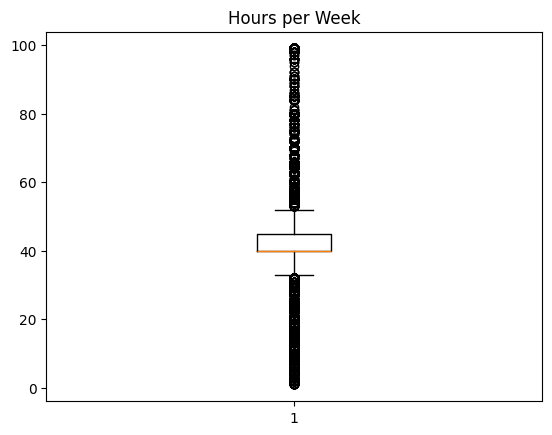

In [104]:
# Hours Per Week
plt.boxplot(data['hours-per-week']); plt.title("Hours per Week"); plt.show()



In [109]:
data.drop(columns=["education"],inplace=True)

In [110]:
encoder=LabelEncoder()

In [113]:
categorical_col=["workclass",'marital-status','occupation','relationship','race','gender','native-country']
for col in categorical_col:
    data[col]=encoder.fit_transform(data[col])

In [115]:
x=data.drop(columns=['income'])
y=data["income"]

In [125]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [126]:
models={
    "LogisticRegression":LogisticRegression(),
    "RandomForest":RandomForestClassifier(),
    "knn":KNeighborsClassifier(),
    "GradientBoosting":GradientBoostingClassifier()
                                    
}

In [127]:
results={}

In [128]:
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8269
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      7479
        >50K       0.70      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.83      0.81      9769

RandomForest Accuracy: 0.8646
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7479
        >50K       0.75      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769

knn Accuracy: 0.8345
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      7479
        >50K       0.66      0.60      0.63      2290

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.

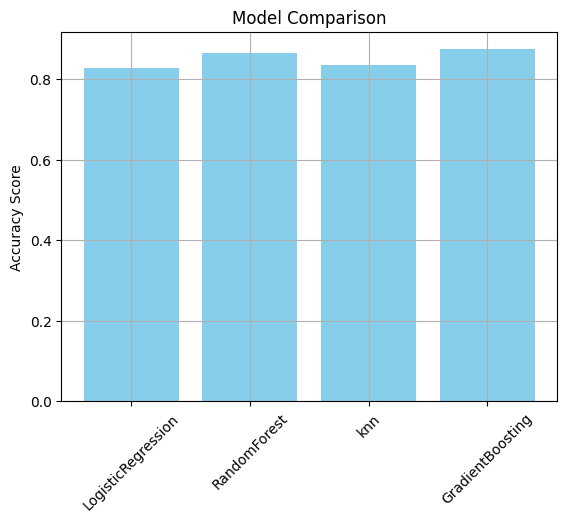

In [130]:
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [132]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Re-train models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = accuracy_score(y_test, preds)
    print(f"{name}: {results[name]:.4f}")

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.7926
RandomForest: 0.8648
knn: 0.7836
GradientBoosting: 0.8736

✅ Best model: GradientBoosting with accuracy 0.8736
✅ Saved best model as best_model.pkl


In [2]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# ----------- PAGE CONFIG ----------- #
st.set_page_config(page_title="Income Classifier", layout="wide")

# ----------- DARK THEME STYLE ----------- #
st.markdown("""
    <style>
        body {
            color: #fff;
            background-color: #0e1117;
        }
        .css-1v3fvcr, .stMarkdown, .stTextInput, .stSelectbox, .stFileUploader {
            color: #fff !important;
            background-color: #262730 !important;
        }
        .stButton > button {
            color: #fff;
            background-color: #5c5f66;
        }
    </style>
""", unsafe_allow_html=True)

# ----------- TITLE ----------- #
st.markdown("<h1 style='color:#00ADB5;'>💰 Income Classification App</h1>", unsafe_allow_html=True)
st.markdown("Upload your dataset and choose a model to classify income levels.")

# ----------- FILE UPLOAD ----------- #
uploaded_file = st.file_uploader("📂 Upload your CSV file", type=["csv"])

if uploaded_file:
    data = pd.read_csv(uploaded_file)
    st.subheader("📊 Initial Data")
    st.dataframe(data.head(), use_container_width=True)

    # ----------- DATA CLEANING ----------- #
    with st.expander("🔧 Data Cleaning & Preprocessing"):
        data["workclass"].replace({"?": "other"}, inplace=True)
        data["occupation"].replace({"?": "other"}, inplace=True)
        data = data[~data["workclass"].isin(["Without-pay", "Never-worked"])]
        data = data[(data['age'] >= 17) & (data['age'] <= 75)]
        data = data[(data['educational-num'] >= 5) & (data['educational-num'] <= 16)]

        if "education" in data.columns:
            data.drop(columns=["education"], inplace=True)

        encoder = LabelEncoder()
        categorical_col = ["workclass", 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
        for col in categorical_col:
            if col in data.columns:
                data[col] = encoder.fit_transform(data[col].astype(str))

        st.success("✅ Data cleaned and encoded successfully.")

    # ----------- MODEL SELECTION ----------- #
    if "income" not in data.columns:
        st.error("❌ The dataset must contain an 'income' column.")
    else:
        x = data.drop(columns=["income"])
        y = data["income"]
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        st.subheader("⚙️ Model Training")

        col1, col2 = st.columns(2)
        with col1:
            model_choice = st.selectbox("Choose a Model", [
                "Logistic Regression", "Random Forest", "KNN", "SVM", "Gradient Boosting"
            ])
        with col2:
            train_button = st.button("🚀 Train Model")

        if train_button:
            if model_choice == "Logistic Regression":
                model = LogisticRegression()
            elif model_choice == "Random Forest":
                model = RandomForestClassifier()
            elif model_choice == "KNN":
                model = KNeighborsClassifier()
            elif model_choice == "SVM":
                model = SVC()
            else:
                model = GradientBoostingClassifier()

            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)

            st.success(f"✅ Model trained. Accuracy: {accuracy_score(Y_test, Y_pred):.2f}")
            st.subheader("📋 Classification Report")
            st.code(classification_report(Y_test, Y_pred), language="text")


2025-07-30 19:50:21.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 19:50:21.870 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 19:50:21.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 19:50:21.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 19:50:21.872 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 19:50:21.872 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 19:50:21.872 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 19:50:21.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar